In [25]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [26]:

df = pd.read_csv('mcdonalds.csv')

df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [27]:
df_encoded = pd.get_dummies(df)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


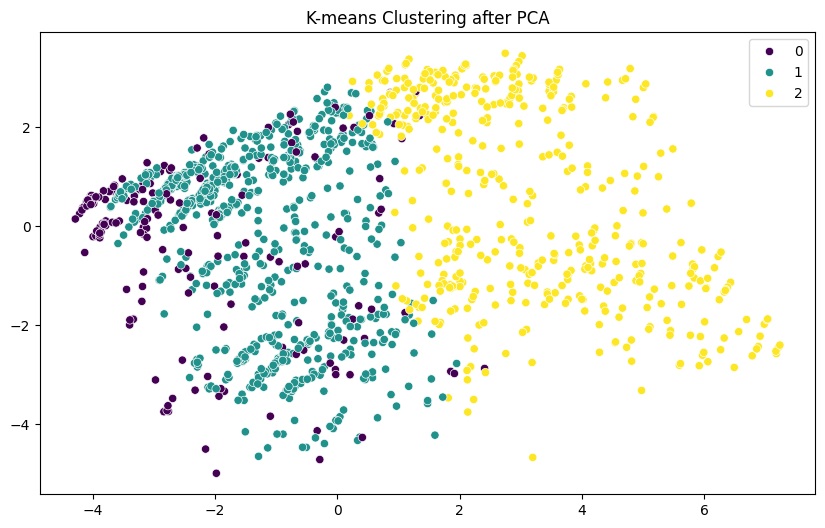

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering after PCA')
plt.show()


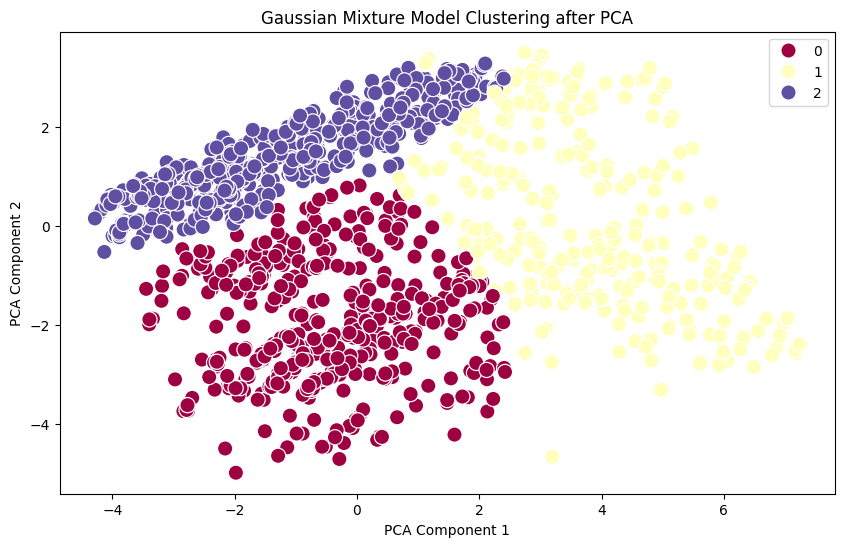

In [29]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

gmm_labels = gmm.fit_predict(df_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=gmm_labels, palette='Spectral', s=120)
plt.title('Gaussian Mixture Model Clustering after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [30]:
print("Shape of scaled DataFrame:", df_scaled.shape)

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

n_features = df_scaled.shape[1]  

kmeans_cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[f"Feature_{i+1}" for i in range(n_features)])
gmm_cluster_means = pd.DataFrame(gmm.means_, columns=[f"Feature_{i+1}" for i in range(n_features)])

print("KMeans Cluster Centers:")
print(kmeans_cluster_centers)

print("GMM Cluster Means:")
print(gmm_cluster_means)


Shape of scaled DataFrame: (1453, 42)
KMeans Cluster Centers:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.375051  -0.356452   0.356452  -0.120107   0.120107  -0.112738   
1  -0.263939  -0.526340   0.526340  -0.263129   0.263129   0.002670   
2   0.314233   1.034618  -1.034618   0.495768  -0.495768   0.037068   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_33  Feature_34  \
0   0.112738   2.555092  -2.555092    0.870309  ...   -0.323030    0.422055   
1  -0.002670  -0.391375   0.391375    0.043153  ...   -0.333721    0.101705   
2  -0.037068  -0.272516   0.272516   -0.395545  ...    0.691834   -0.330394   

   Feature_35  Feature_36  Feature_37  Feature_38  Feature_39  Feature_40  \
0   -0.012941    0.168113   -0.314789    0.168074    0.153871   -0.184844   
1   -0.012203    0.065237   -0.284541    0.212593    0.159048   -0.216179   
2    0.025716   -0.174019    0.604421   -0.426794   -0.329691    0.439141   

   Feature_41  Feature_42  

In [31]:
df.to_csv('fast_food_clusters.csv', index=False)
